# SVM Classification from Scratch on Titanic Dataset

## 1. Import Libraries

In [745]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Data

In [746]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Initial Data Exploration

In [747]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [748]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [749]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 4. Data Preprocessing & Visualization

### 4.1 Handling Missing Values

*   **Age:** Fill with the median age.
*   **Cabin:** Too many missing values, likely drop this column.
*   **Embarked:** Fill with the mode (most frequent value).

In [750]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column
df.drop('Cabin', axis=1, inplace=True)

# Verify missing values are handled
df.isnull().sum()

C:\Users\Mohamed Tamer\AppData\Local\Temp\ipykernel_23996\2617382283.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Mohamed Tamer\AppData\Local\Temp\ipykernel_23996\2617382283.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 4.2 Feature Engineering & Selection

*   Drop irrelevant columns: 'PassengerId', 'Name', 'Ticket'.
*   Convert categorical features ('Sex', 'Embarked') to numerical.

In [751]:
# Drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Convert categorical features
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) # Use one-hot encoding for Embarked

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


### 4.3 Visualization

Let's visualize the relationship between survival and some key features.

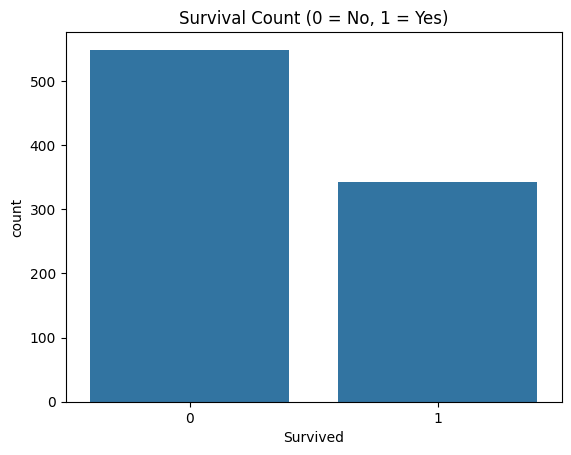

In [752]:
# Survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

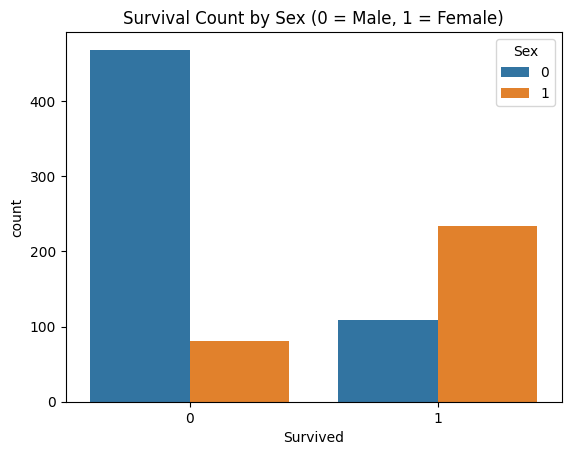

In [753]:
# Survival by Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex (0 = Male, 1 = Female)')
plt.show()

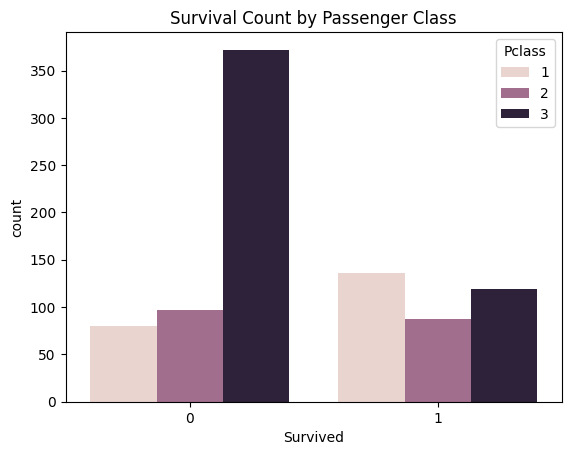

In [754]:
# Survival by Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

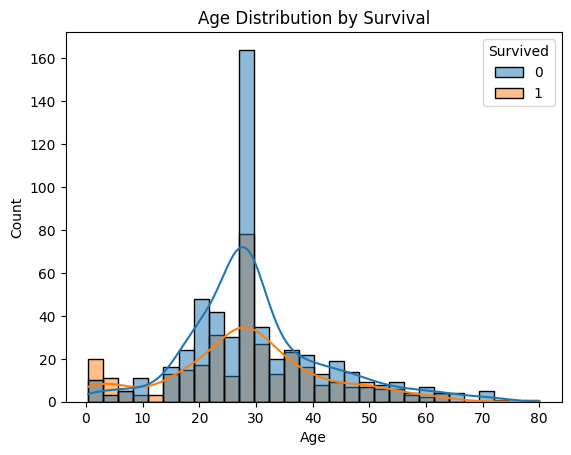

In [755]:
# Age distribution by Survival
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

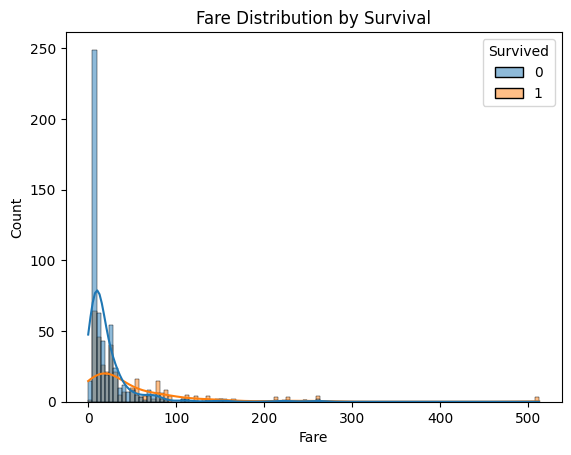

In [756]:
# Fare distribution by Survival
sns.histplot(data=df, x='Fare', hue='Survived', kde=True)
plt.title('Fare Distribution by Survival')
plt.show()


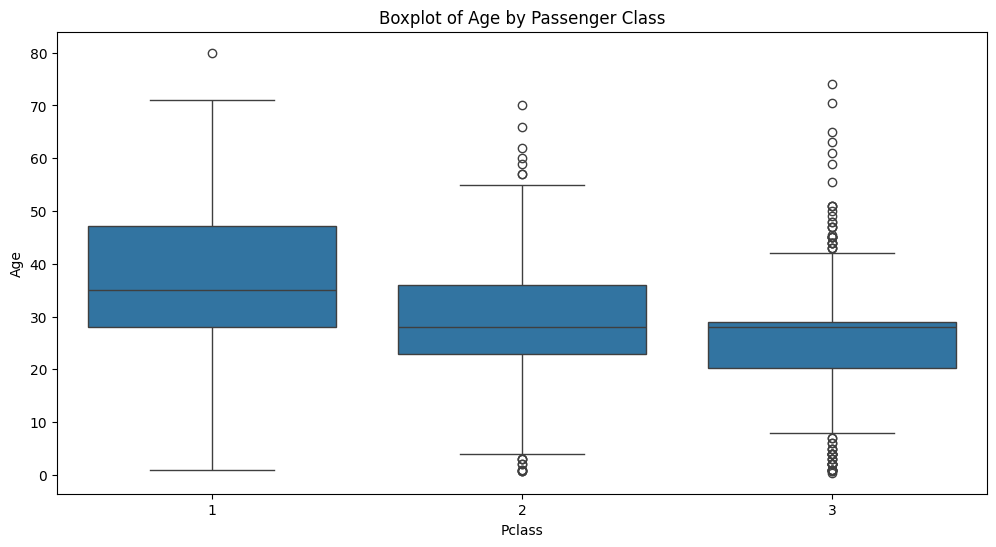

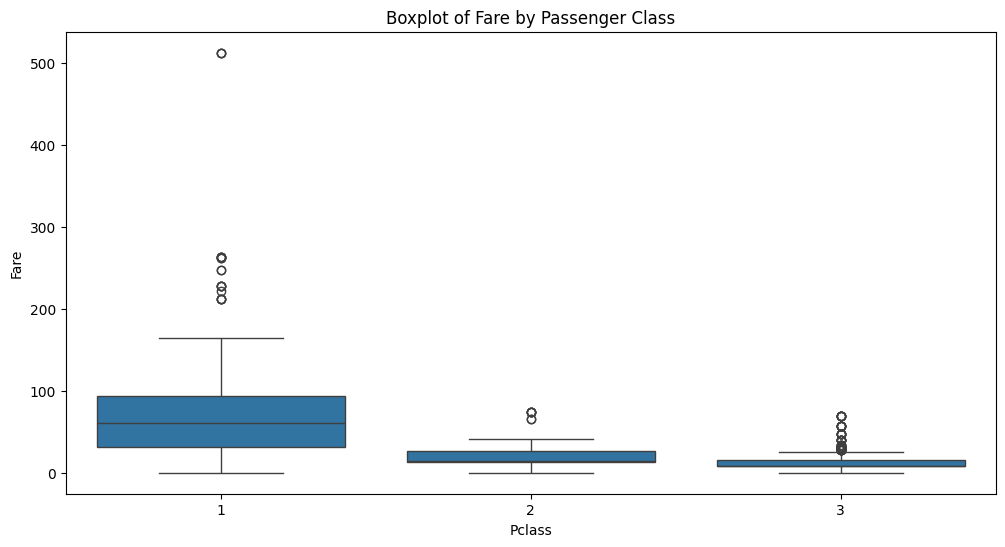

In [757]:
# Boxplot between Pclass, Age, and Fare
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Boxplot of Age by Passenger Class')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Boxplot of Fare by Passenger Class')
plt.show()


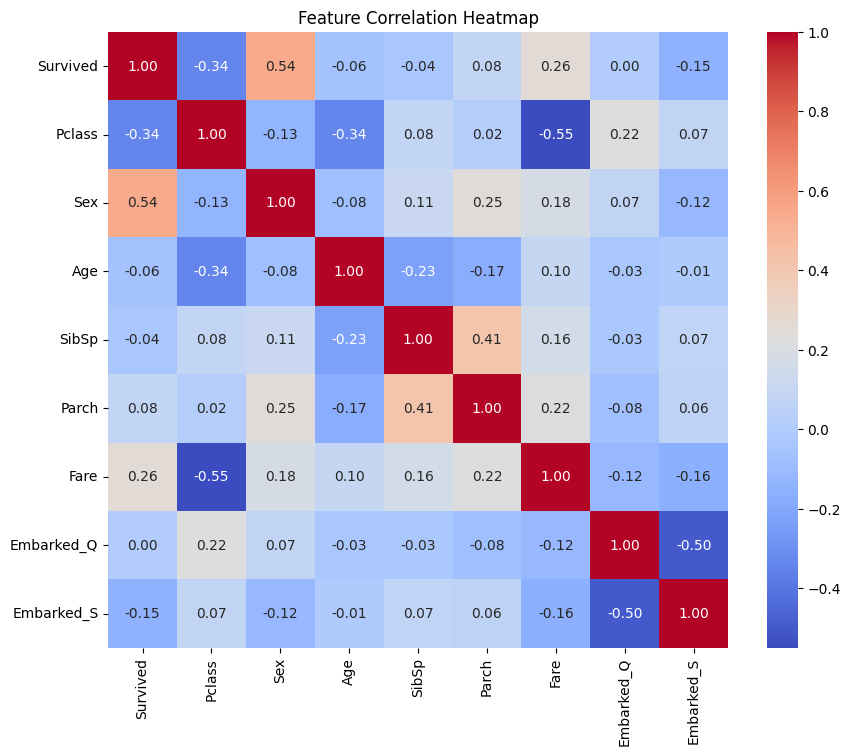

In [758]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

### 4.4 Data Splitting and Scaling

*   Separate features (X) and target (y).
*   Split into training and testing sets.
*   Scale numerical features ('Age', 'Fare', 'SibSp', 'Parch'). Note: SVMs are sensitive to feature scaling.

In [759]:
X = df.drop('Survived', axis=1)
y = df['Survived']

# Convert target variable y to -1 and 1 for SVM
y = np.where(y <= 0, -1, 1)

In [760]:
# Manual Train-Test Split (Example: 80% train, 20% test)
np.random.seed(42)
test_size = 0.2
num_test_samples = int(len(X) * test_size)
indices = np.random.permutation(len(X))
X_train = X.iloc[indices[:-num_test_samples]]
y_train = y[indices[:-num_test_samples]]
X_test = X.iloc[indices[-num_test_samples:]]
y_test = y[indices[-num_test_samples:]]

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 713
Test set size: 178


In [761]:
# Manual Scaling (StandardScaler: (x - mean) / std_dev)
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Calculate mean and std dev from training data ONLY
mean = X_train[numerical_cols].mean()
std = X_train[numerical_cols].std()

# Scale training data
X_train_scaled = X_train.copy()
X_train_scaled[numerical_cols] = (X_train[numerical_cols] - mean) / std

# Scale test data using training mean and std dev
X_test_scaled = X_test.copy()
X_test_scaled[numerical_cols] = (X_test[numerical_cols] - mean) / std

# Display scaled data head
X_train_scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
709,3,0,-0.091553,0.446099,0.706765,-0.338748,False,False
439,2,0,0.133109,-0.481214,-0.493053,-0.429449,False,True
840,3,0,-0.690651,-0.481214,-0.493053,-0.478663,False,True
720,2,1,-1.739072,-0.481214,0.706765,0.000570,False,True
39,3,1,-1.139974,0.446099,-0.493053,-0.415274,False,False


## 5. SVM Implementation from Scratch

In [762]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.losses = [] # To store loss per epoch

    def _get_loss(self, X, y):
        """Calculates the SVM cost function (hinge loss + regularization)."""
        n_samples = X.shape[0]
        distances = 1 - y * (np.dot(X, self.w) - self.b)
        hinge_loss = np.maximum(0, distances) # max(0, 1 - y*f(x))
        cost = (self.lambda_param / 2 * np.dot(self.w, self.w)) + (np.sum(hinge_loss) / n_samples)
        return cost

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1) # Ensure y is -1 or 1
        
        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0
        self.losses = []

        # Gradient Descent
        for epoch in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    # Correctly classified, only update weights due to regularization
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Misclassified or on margin, update weights and bias
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
            
            # Calculate and store loss for the epoch
            loss = self._get_loss(X, y_)
            self.losses.append(loss)
            
            # Optional: Print progress
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch+1}/{self.n_iters}, Loss: {loss:.4f}')

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx) # Returns -1 or 1

## 6. Train the SVM Model

In [763]:
# Convert dataframes to numpy arrays for the SVM class and ensure float type
X_train_np = X_train_scaled.to_numpy().astype(np.float64)
y_train_np = y_train # Already a numpy array
X_test_np = X_test_scaled.to_numpy().astype(np.float64)
y_test_np = y_test # Already a numpy array

# Check dtypes after conversion
print(f"X_train_np dtype: {X_train_np.dtype}")
print(f"X_test_np dtype: {X_test_np.dtype}")

# Instantiate and train the SVM (trying different hyperparameters)
svm_classifier = SVM(learning_rate=0.001, lambda_param=0.001, n_iters=1000)
svm_classifier.fit(X_train_np, y_train_np)

X_train_np dtype: float64
X_test_np dtype: float64
Epoch 100/1000, Loss: 0.4415
Epoch 200/1000, Loss: 0.4405
Epoch 300/1000, Loss: 0.4402
Epoch 400/1000, Loss: 0.4398
Epoch 500/1000, Loss: 0.4402
Epoch 600/1000, Loss: 0.4403
Epoch 700/1000, Loss: 0.4403
Epoch 800/1000, Loss: 0.4402
Epoch 900/1000, Loss: 0.4405
Epoch 1000/1000, Loss: 0.4403


## 7. Evaluate the Model

### 7.1 Plot Loss Curve

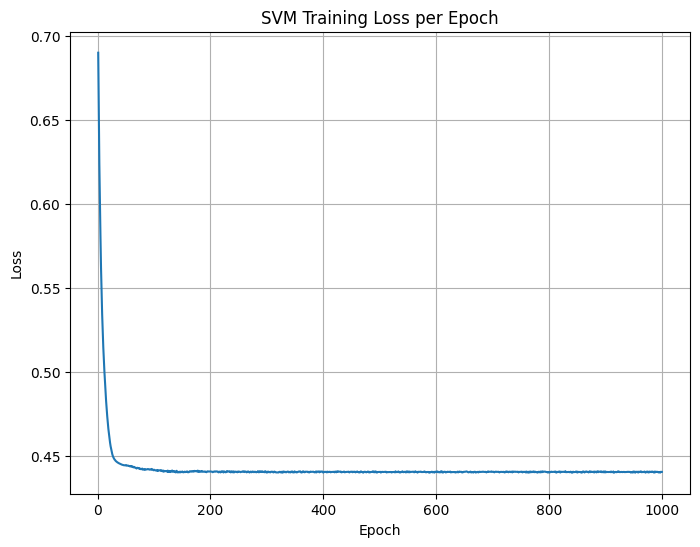

In [764]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, svm_classifier.n_iters + 1), svm_classifier.losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('SVM Training Loss per Epoch')
plt.grid(True)
plt.show()

### 7.2 Make Predictions

In [765]:
y_pred_train = svm_classifier.predict(X_train_np)
y_pred_test = svm_classifier.predict(X_test_np)

### 7.3 Calculate Accuracy

In [766]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

train_accuracy = accuracy(y_train_np, y_pred_train)
test_accuracy = accuracy(y_test_np, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.7854
Test Accuracy: 0.8146


### 7.4 Confusion Matrix

Confusion Matrix (Test Set):
[[99 14]
 [19 46]]


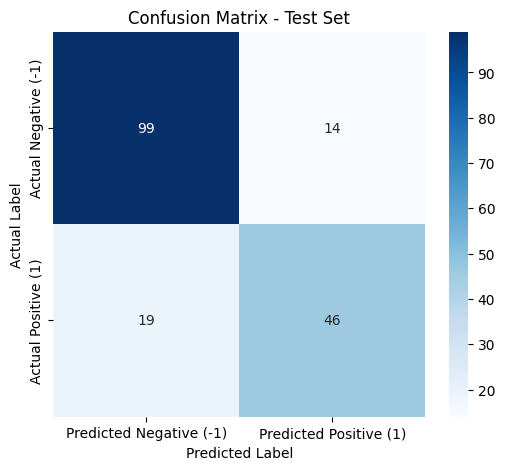

In [767]:
def confusion_matrix(y_true, y_pred):
    """Computes the confusion matrix.
    Assumes y_true and y_pred contain -1 and 1.
    Returns: [[TN, FP], [FN, TP]]
    """
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == -1) & (y_pred == -1))
    fp = np.sum((y_true == -1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == -1))
    return np.array([[tn, fp], [fn, tp]])

cm = confusion_matrix(y_test_np, y_pred_test)
print("Confusion Matrix (Test Set):")
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative (-1)', 'Predicted Positive (1)'], 
            yticklabels=['Actual Negative (-1)', 'Actual Positive (1)'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [768]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def precision_recall_f1(cm):
    """Calculates precision, recall, and F1 score from confusion matrix."""
    # cm is assumed to be in the form [[TN, FP], [FN, TP]]
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
    return precision, recall, f1

test_accuracy = accuracy(y_test_np, y_pred_test)
cm = confusion_matrix(y_test_np, y_pred_test)
precision, recall, f1 = precision_recall_f1(cm)
# Print the metrics
print("Test Set Metrics:")
print(f"Accuracy : {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Test Set Metrics:
Accuracy : 0.8146
Precision: 0.7667
Recall   : 0.7077
F1 Score : 0.7360
